## Import Library

In [1]:
import torch
from torch.autograd import Variable
from torch.nn import functional as F
import matplotlib.pyplot as plt

### Create fake data

In [2]:
x = torch.unsqueeze(torch.linspace(-1,1,100), dim=1) # x data(tensor type), shape = (100,1)
# unsqueeze Method: 把一維數據轉成二維數據，因為 torch 只能處理 二維數據
y = x.pow(2) + 0.2*torch.rand(x.size())


### 建立反向傳播

In [3]:
x = Variable(x)
y = Variable(y)

### 打印數據

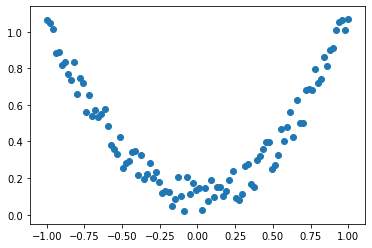

In [4]:
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

### 定義 NN

In [5]:
class Net(torch.nn.Module): # 繼承模塊
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__() # 官方步驟
        self.hidden = torch.nn.Linear(n_features, n_hidden) # 隱藏層
        self.predict = torch.nn.Linear(n_hidden, n_output) # 輸出層
    def forward(self, x): # 向前傳遞，真正搭神經網路地方，得到輸入訊息
        x = F.relu(self.hidden(x)) # activation function for hidden layer
        x = self.predict(x) # 預測值可以從正無窮到負無窮，所以不能用激勵函數
        return x

### 開始搭建神經網路

In [6]:
net = Net(1, 10, 1)
print(net) # 看自己搭的神經網路

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


### 優化神經網路

In [7]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5) # lr: learning rate, 越高越快, 數值小於 1
loss_func = torch.nn.MSELoss() # 均方差

### Visualize the Regression

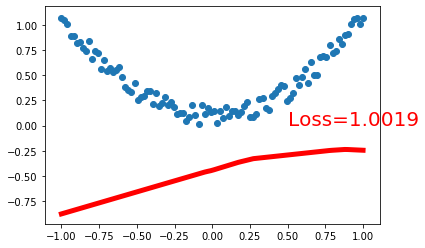

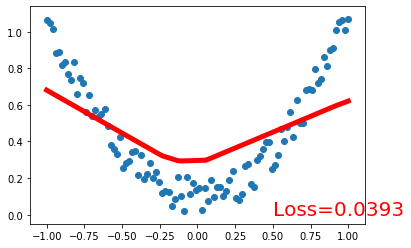

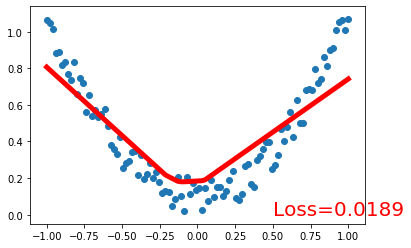

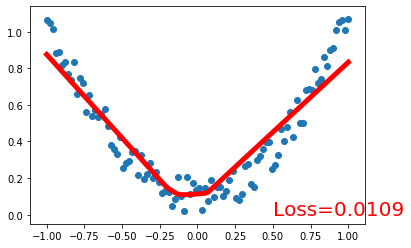

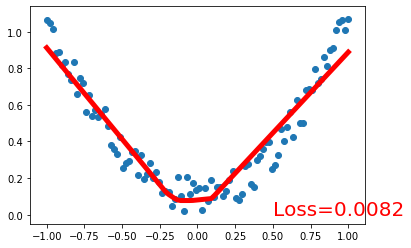

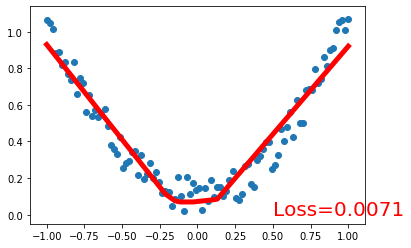

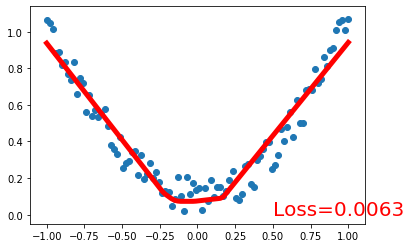

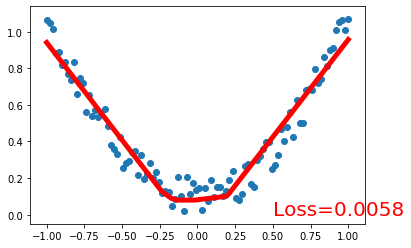

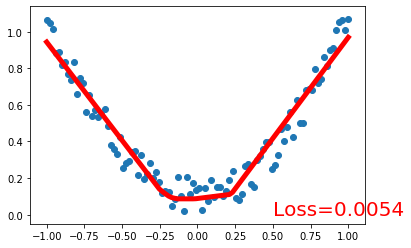

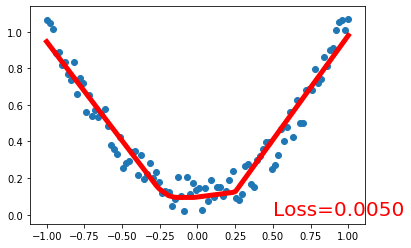

In [8]:
for t in range(100):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()

### Get PREDICTION

In [9]:
prediction

tensor([[0.9472],
        [0.9252],
        [0.9032],
        [0.8812],
        [0.8592],
        [0.8371],
        [0.8151],
        [0.7931],
        [0.7711],
        [0.7490],
        [0.7270],
        [0.7050],
        [0.6830],
        [0.6610],
        [0.6389],
        [0.6169],
        [0.5949],
        [0.5729],
        [0.5508],
        [0.5288],
        [0.5068],
        [0.4848],
        [0.4628],
        [0.4407],
        [0.4187],
        [0.3967],
        [0.3747],
        [0.3526],
        [0.3306],
        [0.3086],
        [0.2866],
        [0.2646],
        [0.2425],
        [0.2205],
        [0.1985],
        [0.1765],
        [0.1544],
        [0.1412],
        [0.1289],
        [0.1167],
        [0.1071],
        [0.1029],
        [0.0994],
        [0.0994],
        [0.0994],
        [0.0994],
        [0.0994],
        [0.0994],
        [0.0994],
        [0.1008],
        [0.1030],
        [0.1052],
        [0.1075],
        [0.1097],
        [0.1120],
        [0